In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df2 = pd.read_csv('E:\Data Analysis Practice\monthly_csv.csv')
df2.Price.count()
df2['perc_change']=df2.Price.pct_change()
df2['log_price']=np.log(df2['Price'])
df2['log_change']=df2.log_price.diff()
dfm = df2
dfm['Year']= dfm['Date'].apply(lambda x : x[0:4]).astype(int)
dfm.rename(columns = {"Date" : 'Year_Month'}, inplace = True)
dfm = dfm.iloc[252:].copy().reset_index(drop = True)
dfm.head()

,Year_Month,Price,perc_change,log_price,log_change,Year
0,1971-01,37.868,0.011594,3.634106,0.011527,1971
1,1971-02,38.716,0.022394,3.656253,0.022147,1971
2,1971-03,38.873,0.004055,3.660300,0.004047,1971
3,1971-04,39.001,0.003293,3.663587,0.003287,1971
4,1971-05,40.493,0.038255,3.701129,0.037542,1971


<Figure size 1152x432 with 0 Axes>

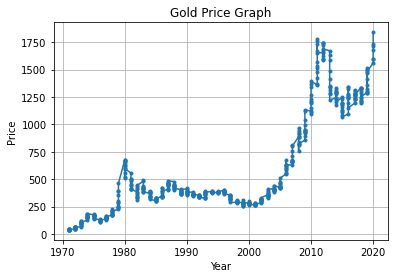

<Figure size 1152x432 with 0 Axes>

In [36]:
x = dfm['Year']
y = dfm['Price']
plt.plot(x, y, marker = '.')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Gold Price Graph')
plt.grid()
plt.figure(figsize=(16,6))


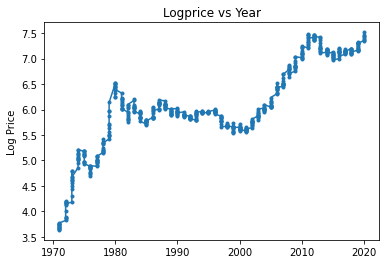

<Figure size 1440x576 with 0 Axes>

In [37]:
y = dfm.log_price
x = dfm.Year
plt.plot(x, y, marker = '.')
plt.ylabel('Log Price')
plt.title('Logprice vs Year')
plt.figure(figsize =(20,8))
plt.show()

In [38]:
dfm.describe()

,Price,perc_change,log_price,log_change,Year
count,595.000000,595.000000,595.000000,595.000000,595.000000
mean,577.934934,0.007755,6.047192,0.006547,1995.294118
std,453.260394,0.050084,0.835018,0.048113,14.326844
min,37.868000,-0.167620,3.634106,-0.183466,1971.000000
25%,296.232500,-0.017300,5.691144,-0.017452,1983.000000
50%,385.450000,0.001690,5.954411,0.001688,1995.000000
75%,816.377500,0.027527,6.704867,0.027155,2008.000000
max,1840.807000,0.454883,7.517959,0.374926,2020.000000


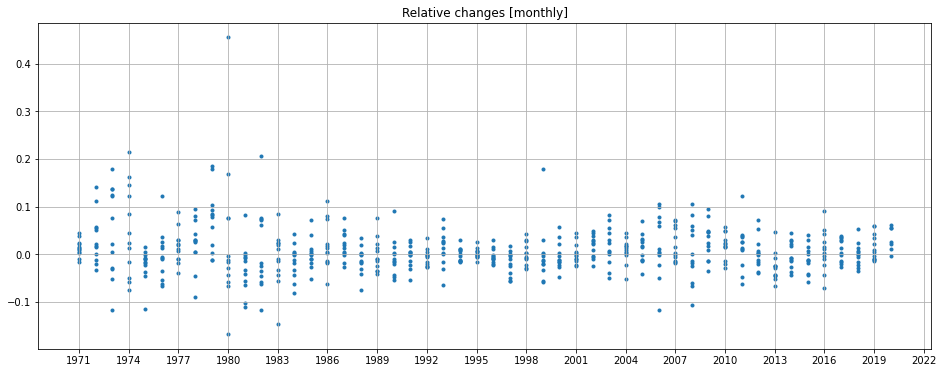

In [39]:
#fig : This method return the figure layout.
#ax : This method return the axes.Axes object or array of Axes objects.
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(dfm.Year, dfm.perc_change, marker='.')
ax.xaxis.set_major_locator(plt.MaxNLocator(20)) # reduce number of x-labels
plt.title('Relative changes [monthly]')
plt.grid()
plt.show()

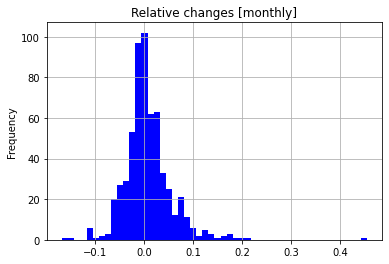

In [40]:
dfm.perc_change.plot(kind = 'hist', bins = 50, color = 'blue')
plt.title('Relative changes [monthly]')
plt.grid()
plt.show()

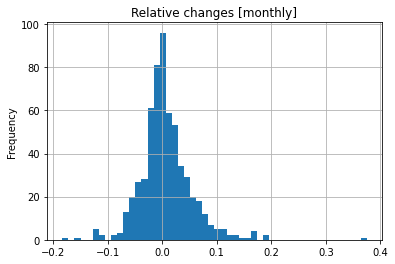

In [41]:
dfm.log_change.plot(kind = 'hist', bins = 50)
plt.title('Relative changes [monthly]')
plt.grid()
plt.show()

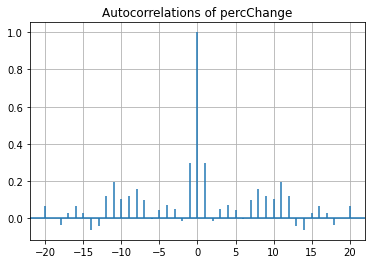

In [42]:
plt.acorr(dfm.perc_change, maxlags=20)
plt.title('Autocorrelations of percChange')
plt.grid()
plt.show()

In [43]:
#shift() function to shift the index axis by 2 periods in a time-series data
# calc autocorrelation for lag 1 (month)
print("Value of Pearson correlation with 1 month lag = ", dfm.perc_change.corr(dfm.perc_change.shift(1), method='pearson'))
print("Value of Spearman correlation with 1 month lag = ", dfm.perc_change.corr(dfm.perc_change.shift(1), method='spearman'))

Value of Pearson correlation with 1 month lag =  0.2832741918816106
Value of Spearman correlation with 1 month lag =  0.25373404714739894


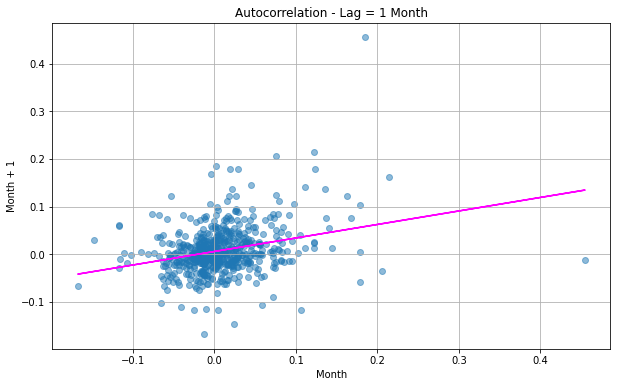

In [44]:
x1 = np.asarray(dfm.perc_change.shift(1))
y1 = np.asarray(dfm.perc_change)

plt.figure(figsize = (10,6))
plt.scatter(x1[1:], y1[1:], alpha = 0.5) # alpha value is for the color depth of marker in scatter plot
# we also leave the first data point because we shift one place ahead
a, b = np.polyfit(x1[1:], y1[1:], 1) # plotting regression line on the scatter plot
plt.plot(x1, a*x1 + b, color = 'magenta')
plt.title('Autocorrelation - Lag = 1 Month')
plt.xlabel('Month')
plt.ylabel('Month + 1')
plt.grid()
plt.show()

In [45]:
# calc autocorrelation for lag 2 (month)
print('Value of Spearman correlation with 1 month lag = ', dfm.perc_change.corr(dfm.perc_change.shift(2), method='pearson'))
print('Value of Spearman correlation with 2 month lag = ', dfm.perc_change.corr(dfm.perc_change.shift(2), method ='spearman'))

Value of Spearman correlation with 1 month lag =  -0.03807394874686182
Value of Spearman correlation with 2 month lag =  -0.014326702142891015


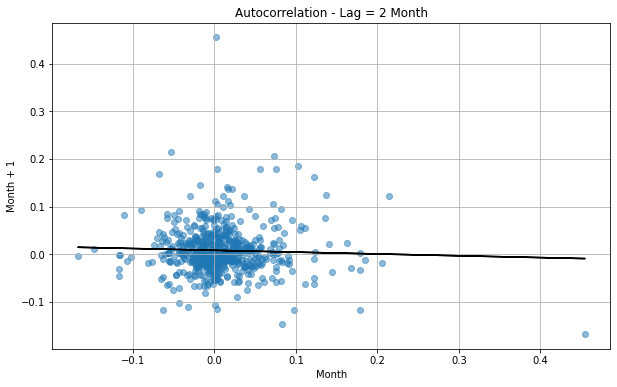

In [46]:
x2 = dfm.perc_change.shift(2)
y2 = dfm.perc_change

plt.figure(figsize = (10, 6))
plt.scatter(x2[2:], y2[2:], alpha = 0.5)
c, d = np.polyfit(x2[2:], y2[2:], 1)
plt.plot(x2, c*x2 + d, color = 'black')
plt.title('Autocorrelation - Lag = 2 Month')
plt.xlabel('Month')
plt.ylabel('Month + 1')
plt.grid()
plt.show()

In [47]:
# making a table for extreme percent changes in gold prices over the years
threshold_x = 0.15
df_ext = dfm[abs(dfm.perc_change)>threshold_x]
df_ext

,Year_Month,Price,perc_change,log_price,log_change,Year
29,1973-06,119.800,0.178867,4.785824,0.164554,1973
36,1974-01,129.027,0.214532,4.860022,0.194359,1974
37,1974-02,150.000,0.162547,5.010635,0.150614,1974
104,1979-09,354.498,0.178545,5.870703,0.164280,1979
107,1979-12,463.666,0.184278,6.139164,0.169133,1979
108,1980-01,674.580,0.454883,6.514090,0.374926,1980
110,1980-03,554.276,-0.167620,6.317663,-0.183466,1980
113,1980-06,600.786,0.168235,6.398239,0.155494,1980
140,1982-09,438.150,0.205653,6.082561,0.187021,1982
345,1999-10,311.562,0.178062,5.741598,0.163871,1999


In [48]:
# summing up the log changes of 12 months gives us the log change for the full year
df_annreturns = pd.DataFrame(dfm.groupby('Year').sum('log_change'))
df_annreturns['Return']= np.exp(df_annreturns.log_change) - 1 # add also simple return (exp(logR)-1)
df_annreturns


,Price,perc_change,log_price,log_change,Return
Year,,,,,
1971,489.453,0.151737,44.488641,0.149147,0.160843
1972,697.254,0.404052,48.630190,0.383698,0.467702
1973,1165.494,0.568424,54.735205,0.510239,0.665689
1974,1909.153,0.607159,60.778661,0.547548,0.729009
1975,1933.110,-0.266870,60.934947,-0.276732,-0.241743
1976,1497.947,-0.026281,57.899291,-0.041075,-0.040243
1977,1772.542,0.190837,59.921490,0.182765,0.200533
1978,2320.257,0.276410,63.127942,0.258864,0.295457
1979,3687.639,0.851730,68.422492,0.802131,1.230289


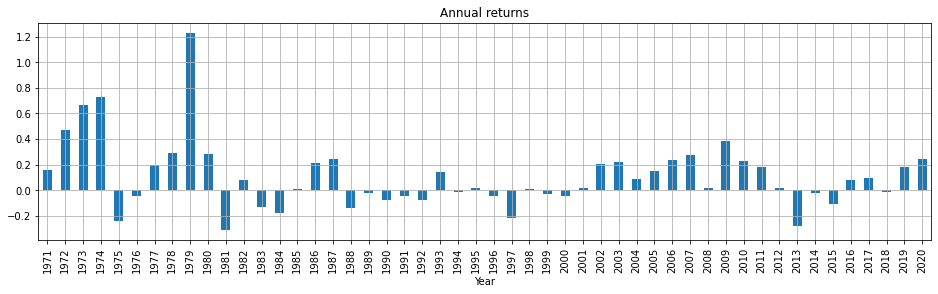

In [49]:
plt.figure(figsize=(16,4))
df_annreturns.Return.plot(kind='bar') #plotting bar chart for annual returns 
plt.title('Annual returns')
plt.grid()
plt.show()

In [51]:
# we analyze the year 1979 because of highest returns
dfm[(dfm.Year == '1979') | (dfm.Year_Month == '1978-12')]

,Year_Month,Price,perc_change,log_price,log_change,Year
95,1978-12,207.895,0.003926,5.337033,0.003918,1978
